## Import libraries

In [46]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from dtreeviz.trees import *

import math

pd.set_option('display.max_columns', None)

## Load data
Read csv file from Github into Pandas DataFrame, note ?raw=true url sufix 

In [47]:
url = "https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.csv?raw=true"
df = pd.read_csv(url)


In [48]:
df['population_density'].mean()

453.9025463414634

## Check columns

In [49]:
df.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccina

## Clean the data
First remove rows (countries) that have more than 80% of missing values\
Then remove columns that contain missing values 

In [50]:
df = df.dropna(axis=1, thresh=len(df)*0.8)
df = df.dropna(axis=0, how='any')

## Define dependent and independent variables
Dependent variables are the ones we want to prrdict, in this case total death per million.\
We use independent variables for predictions. In this case, dozen variabls were picked to predict covid dath rate.

In [51]:
x = df[['median_age', 'aged_70_older', 'gdp_per_capita','population_density', 'cardiovasc_death_rate', 'diabetes_prevalence', 'life_expectancy', 'human_development_index', 'aged_65_older', 'human_development_index', 'total_vaccinations_per_hundred', 'people_fully_vaccinated_per_hundred']]
y = df['total_deaths_per_million']

## Split data to training and testing set

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [70]:
x_train.shape, x_test.shape

((102, 12), (44, 12))

## Build the decission tree

In [53]:
regressor = DecisionTreeRegressor(random_state=1, min_samples_leaf=20)
regressor.fit(x_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

## Visualize the decision tree

[Text(581.25, 943.75, 'aged_65_older <= 6.336\nmse = 816243.172\nsamples = 102\nvalue = 731.684'),
 Text(290.625, 566.25, 'human_development_index <= 0.609\nmse = 76573.53\nsamples = 46\nvalue = 213.957'),
 Text(145.3125, 188.75, 'mse = 5701.312\nsamples = 23\nvalue = 66.547'),
 Text(435.9375, 188.75, 'mse = 103986.229\nsamples = 23\nvalue = 361.367'),
 Text(871.875, 566.25, 'population_density <= 123.841\nmse = 1022792.629\nsamples = 56\nvalue = 1156.96'),
 Text(726.5625, 188.75, 'mse = 1082881.577\nsamples = 36\nvalue = 1398.719'),
 Text(1017.1875, 188.75, 'mse = 620057.481\nsamples = 20\nvalue = 721.794')]

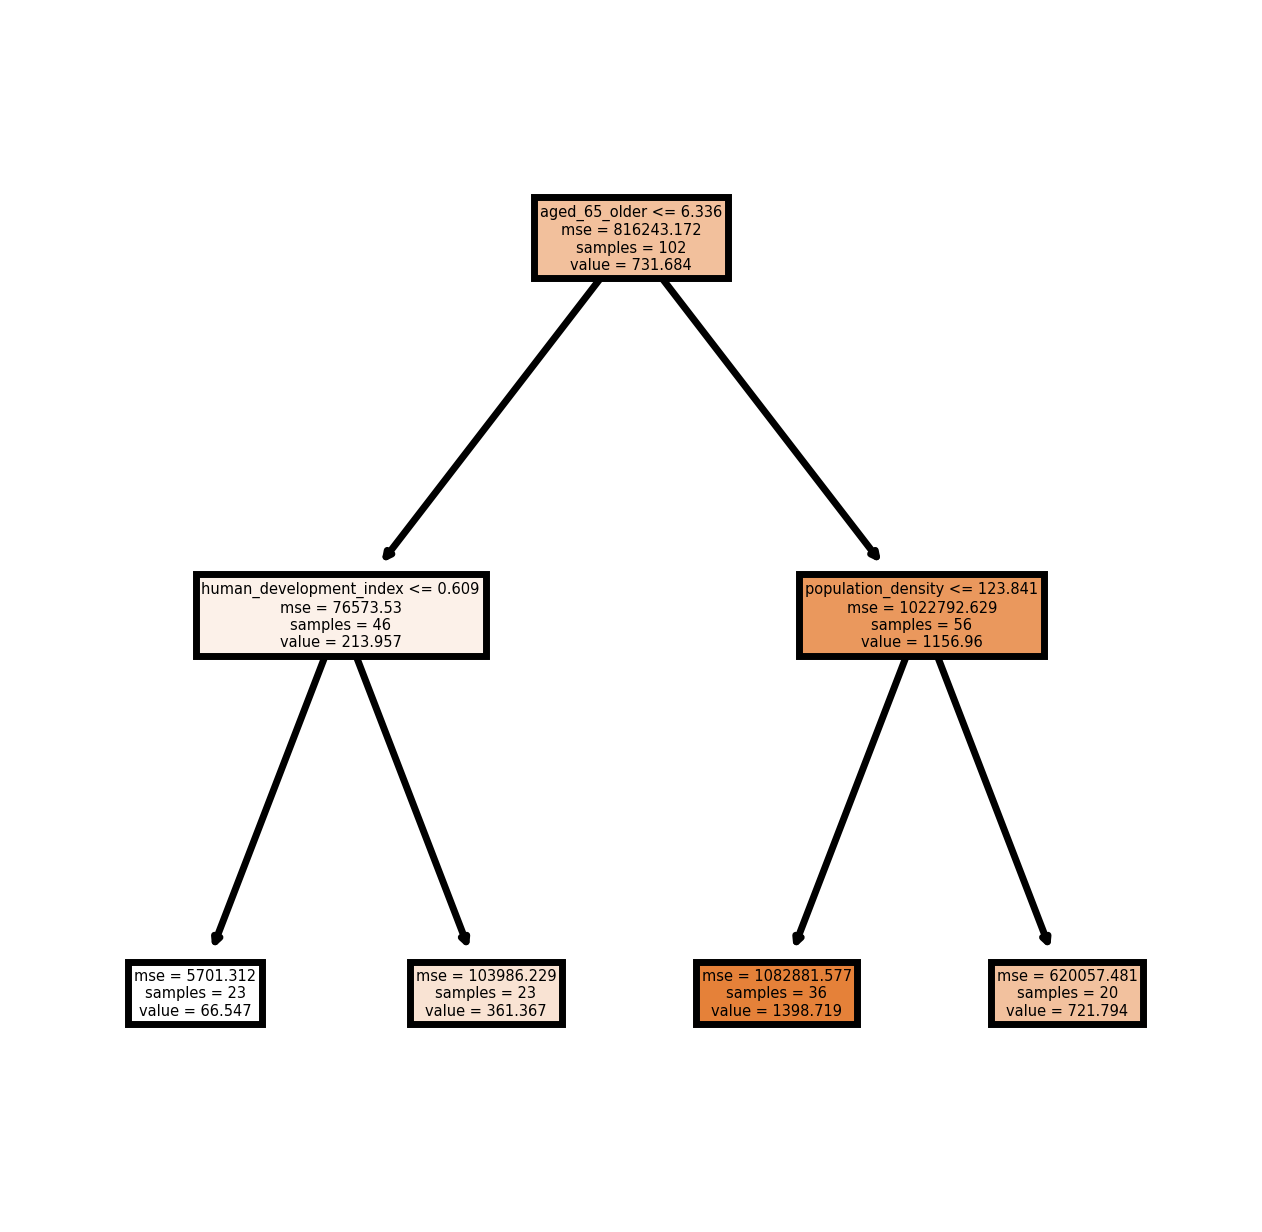

In [54]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=500)
tree.plot_tree(regressor, feature_names=x.columns.to_numpy(), filled = True)  

## Visualize the distribution of the data for each node

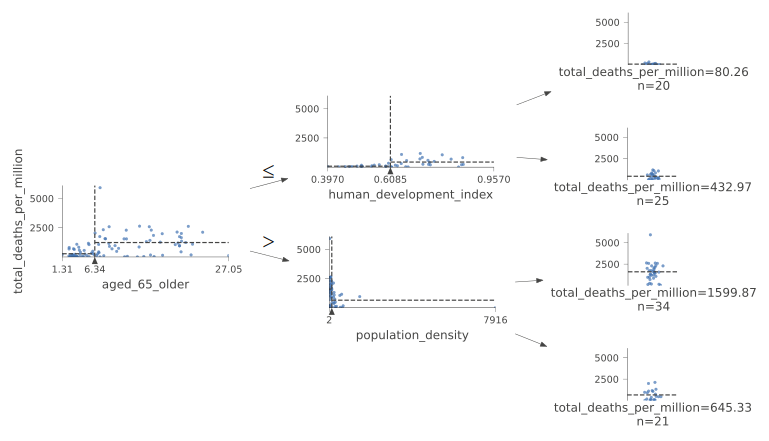

In [55]:
samp_idx = np.random.permutation(len(y))[:100]

dtreeviz(regressor, x.iloc[samp_idx], y.iloc[samp_idx], x.columns, 'total_deaths_per_million',
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

## Calculate RMSE for training and testing set

In [56]:
def r_mse(pred,y): 
    return round(math.sqrt(((pred-y)**2).mean()), 4)
def m_rmse(m, xs, y): 
    return r_mse(m.predict(xs), y)

In [57]:
m_rmse(regressor_rf, x_train, y_train), m_rmse(regressor_rf, x_test, y_test)

769.2202739726027

## Compare predicted values with actual ones

In [58]:
df['total_deaths_per_million'].mean()

769.2202739726027

In [59]:
np.set_printoptions(suppress=True)
np.stack((regressor.predict(x_test), y_test.to_numpy()), axis=-1)

array([[ 361.36708696,  197.447     ],
       [1398.71883333, 2634.661     ],
       [  66.54673913,   20.291     ],
       [1398.71883333, 2584.915     ],
       [  66.54673913,   87.67      ],
       [ 361.36708696, 1171.633     ],
       [1398.71883333, 1828.71      ],
       [ 361.36708696,  405.149     ],
       [ 721.79355   ,  746.112     ],
       [ 361.36708696,  584.702     ],
       [ 721.79355   ,  167.031     ],
       [  66.54673913,   75.789     ],
       [1398.71883333,  122.204     ],
       [ 721.79355   , 1311.552     ],
       [ 721.79355   , 1906.402     ],
       [  66.54673913,   11.4       ],
       [ 361.36708696,  766.714     ],
       [1398.71883333, 1706.237     ],
       [1398.71883333, 2329.624     ],
       [ 361.36708696,  563.365     ],
       [  66.54673913,   10.343     ],
       [1398.71883333, 1737.17      ],
       [ 361.36708696,  115.648     ],
       [ 721.79355   , 2116.079     ],
       [  66.54673913,  169.044     ],
       [ 721.79355   , 10

## Create random forest

In [60]:
def rf(xs, y, n_estimators=15, max_samples=120,
       max_features=0.5, min_samples_leaf=10, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [61]:
regressor_rf = rf(x, y)

## Calculate RMSE for training and testing set

In [67]:
m_rmse(regressor, x_train, y_train), m_rmse(regressor, x_test, y_test)

(726.9848, 587.8191)

## Feature importance
Visualize how important each dependent variable is in predicting the independent variable

In [63]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':regressor_rf.feature_importances_}
                       ).sort_values('imp', ascending=False)
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

In [64]:
fi = rf_feat_importance(regressor_rf, x)
fi

,cols,imp
1,aged_70_older,0.249724
8,aged_65_older,0.240008
3,population_density,0.105093
2,gdp_per_capita,0.071902
6,life_expectancy,0.062586
5,diabetes_prevalence,0.052823
9,human_development_index,0.051603
10,total_vaccinations_per_hundred,0.048750
7,human_development_index,0.045260
11,people_fully_vaccinated_per_hundred,0.041198


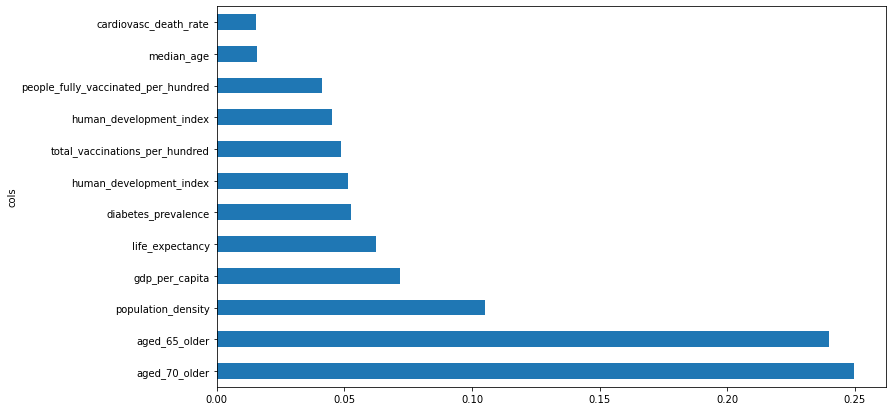

In [65]:
plot_fi(fi);